In [1]:
# Import necessary libraries
import pandas as pd  # For handling data in DataFrame format
import numpy as np  # For numerical operations and handling arrays
import seaborn as sns  # For data visualization, especially statistical plots
import matplotlib.pyplot as plt  # For creating plots and visualizations
import warnings  # To handle and suppress warnings in the code
from sklearn.utils import resample  # For data manipulation (e.g., resampling)

# Ignore warnings to avoid cluttering the output with unnecessary messages
warnings.filterwarnings("ignore")

In [2]:
# Load the dataset for application records into a pandas DataFrame
app = pd.read_csv('application_record.csv')

# Load the dataset for credit records into a pandas DataFrame
credit = pd.read_csv('credit_record.csv')

In [3]:
def bar_plot(df, column):
    # Create a count plot (bar plot) for the specified column in the DataFrame
    sns.countplot(data=df, x=column)
    
    # Add the x-axis label with the column name
    plt.xlabel(column)
    
    # Add the y-axis label with 'Count'
    plt.ylabel("Count")
    
    # Display the plot
    plt.show()

In [4]:
app.head()

,ID,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,DAYS_BIRTH,DAYS_EMPLOYED,FLAG_MOBIL,FLAG_WORK_PHONE,FLAG_PHONE,FLAG_EMAIL,OCCUPATION_TYPE,CNT_FAM_MEMBERS
0,5008804,M,Y,Y,0,427500.0,Working,Higher education,Civil marriage,Rented apartment,-12005,-4542,1,1,0,0,NaN,2.0
1,5008805,M,Y,Y,0,427500.0,Working,Higher education,Civil marriage,Rented apartment,-12005,-4542,1,1,0,0,NaN,2.0
2,5008806,M,Y,Y,0,112500.0,Working,Secondary / secondary special,Married,House / apartment,-21474,-1134,1,0,0,0,Security staff,2.0
3,5008808,F,N,Y,0,270000.0,Commercial associate,Secondary / secondary special,Single / not married,House / apartment,-19110,-3051,1,0,1,1,Sales staff,1.0
4,5008809,F,N,Y,0,270000.0,Commercial associate,Secondary / secondary special,Single / not married,House / apartment,-19110,-3051,1,0,1,1,Sales staff,1.0


In [5]:
credit.head()

,ID,MONTHS_BALANCE,STATUS
0,5001711,0,X
1,5001711,-1,0
2,5001711,-2,0
3,5001711,-3,0
4,5001712,0,C


In [6]:
app.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 438557 entries, 0 to 438556
Data columns (total 18 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   ID                   438557 non-null  int64  
 1   CODE_GENDER          438557 non-null  object 
 2   FLAG_OWN_CAR         438557 non-null  object 
 3   FLAG_OWN_REALTY      438557 non-null  object 
 4   CNT_CHILDREN         438557 non-null  int64  
 5   AMT_INCOME_TOTAL     438557 non-null  float64
 6   NAME_INCOME_TYPE     438557 non-null  object 
 7   NAME_EDUCATION_TYPE  438557 non-null  object 
 8   NAME_FAMILY_STATUS   438557 non-null  object 
 9   NAME_HOUSING_TYPE    438557 non-null  object 
 10  DAYS_BIRTH           438557 non-null  int64  
 11  DAYS_EMPLOYED        438557 non-null  int64  
 12  FLAG_MOBIL           438557 non-null  int64  
 13  FLAG_WORK_PHONE      438557 non-null  int64  
 14  FLAG_PHONE           438557 non-null  int64  
 15  FLAG_EMAIL       

In [7]:
credit.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1048575 entries, 0 to 1048574
Data columns (total 3 columns):
 #   Column          Non-Null Count    Dtype 
---  ------          --------------    ----- 
 0   ID              1048575 non-null  int64 
 1   MONTHS_BALANCE  1048575 non-null  int64 
 2   STATUS          1048575 non-null  object
dtypes: int64(2), object(1)
memory usage: 24.0+ MB


In [8]:
# Group the 'credit' DataFrame by the 'ID' column and calculate the minimum 'MONTHS_BALANCE' for each group
begin_month = pd.DataFrame(credit.groupby(["ID"])["MONTHS_BALANCE"].agg(min))

In [9]:
# Rename the 'MONTHS_BALANCE' column to 'first_month' in the 'begin_month' DataFrame
begin_month = begin_month.rename(columns={'MONTHS_BALANCE': 'first_month'})

In [10]:
begin_month.head()

,first_month
ID,
5001711,-3
5001712,-18
5001713,-21
5001714,-14
5001715,-59


In [11]:
# Merge the 'app' DataFrame with the 'begin_month' DataFrame on the 'ID' column
# Perform a left join to keep all rows from 'app' and match rows from 'begin_month'
data = pd.merge(app, begin_month, how="left", on="ID")

In [12]:
app.shape

(438557, 18)

In [13]:
credit['STATUS'].value_counts()

STATUS
C    442031
0    383120
X    209230
1     11090
5      1693
2       868
3       320
4       223
Name: count, dtype: int64

In [14]:
# Replace 'C' and 'X' values in the 'STATUS' column with 0 (missing or inactive status)
credit['STATUS'].replace({'C': 0, 'X': 0}, inplace=True)
# Convert the 'STATUS' column to integer type
credit['STATUS'] = credit['STATUS'].astype('int')
# Apply a lambda function to convert any positive value in 'STATUS' to 1, and 0 otherwise
credit['STATUS'] = credit['STATUS'].apply(lambda x: 1 if x > 0 else 0)

In [15]:
# Drop the 'MONTHS_BALANCE' column from the 'credit' DataFrame
df = credit.drop('MONTHS_BALANCE', axis=1)

# Merge the 'data' DataFrame with the modified 'df' DataFrame on the 'ID' column
# Perform a left join to keep all rows from 'data' and match rows from 'df'
data = pd.merge(data, df, how="left", on="ID")

In [16]:
# Check for missing (null) values in the 'data' DataFrame and sum them for each column
data.isnull().sum()

ID                          0
CODE_GENDER                 0
FLAG_OWN_CAR                0
FLAG_OWN_REALTY             0
CNT_CHILDREN                0
AMT_INCOME_TOTAL            0
NAME_INCOME_TYPE            0
NAME_EDUCATION_TYPE         0
NAME_FAMILY_STATUS          0
NAME_HOUSING_TYPE           0
DAYS_BIRTH                  0
DAYS_EMPLOYED               0
FLAG_MOBIL                  0
FLAG_WORK_PHONE             0
FLAG_PHONE                  0
FLAG_EMAIL                  0
OCCUPATION_TYPE        362928
CNT_FAM_MEMBERS             0
first_month            402100
STATUS                 402100
dtype: int64

In [17]:
# Drop the 'OCCUPATION_TYPE' column from the 'data' DataFrame due to missing values
data.drop(columns=["OCCUPATION_TYPE"], inplace=True)

In [18]:
data.head()

,ID,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,DAYS_BIRTH,DAYS_EMPLOYED,FLAG_MOBIL,FLAG_WORK_PHONE,FLAG_PHONE,FLAG_EMAIL,CNT_FAM_MEMBERS,first_month,STATUS
0,5008804,M,Y,Y,0,427500.0,Working,Higher education,Civil marriage,Rented apartment,-12005,-4542,1,1,0,0,2.0,-15.0,0.0
1,5008804,M,Y,Y,0,427500.0,Working,Higher education,Civil marriage,Rented apartment,-12005,-4542,1,1,0,0,2.0,-15.0,0.0
2,5008804,M,Y,Y,0,427500.0,Working,Higher education,Civil marriage,Rented apartment,-12005,-4542,1,1,0,0,2.0,-15.0,0.0
3,5008804,M,Y,Y,0,427500.0,Working,Higher education,Civil marriage,Rented apartment,-12005,-4542,1,1,0,0,2.0,-15.0,0.0
4,5008804,M,Y,Y,0,427500.0,Working,Higher education,Civil marriage,Rented apartment,-12005,-4542,1,1,0,0,2.0,-15.0,0.0


In [19]:
data.dropna(inplace = True)

In [20]:
data.drop("ID" , axis = 1 , inplace = True)

In [21]:
data["CODE_GENDER"].value_counts()

CODE_GENDER
F    518851
M    258864
Name: count, dtype: int64

In [22]:
data["CODE_GENDER"].describe()

count     777715
unique         2
top            F
freq      518851
Name: CODE_GENDER, dtype: object

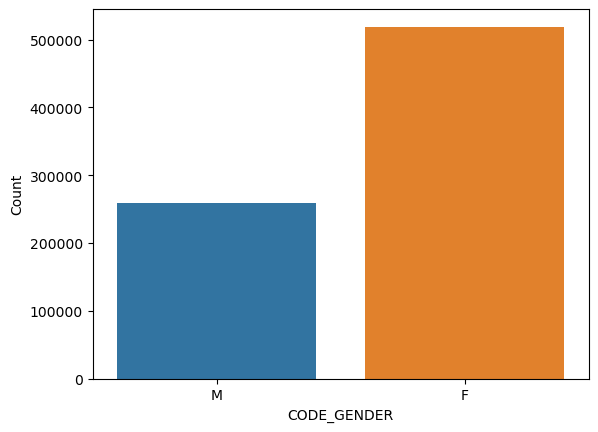

In [26]:
bar_plot(data , "CODE_GENDER")

In [23]:
data["FLAG_OWN_CAR"].value_counts()

FLAG_OWN_CAR
N    473355
Y    304360
Name: count, dtype: int64

In [24]:
data["FLAG_OWN_REALTY"].value_counts()

FLAG_OWN_REALTY
Y    512948
N    264767
Name: count, dtype: int64

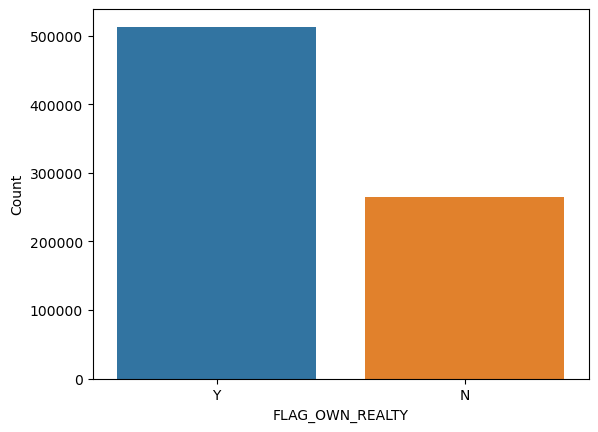

In [25]:
bar_plot(data , "FLAG_OWN_REALTY")

In [26]:
data["CNT_CHILDREN"].value_counts()

CNT_CHILDREN
0     540639
1     155638
2      70399
3       9328
4       1224
5        324
14       111
7         46
19         6
Name: count, dtype: int64

In [27]:
data["CNT_CHILDREN"].describe()

count    777715.000000
mean          0.428082
std           0.745755
min           0.000000
25%           0.000000
50%           0.000000
75%           1.000000
max          19.000000
Name: CNT_CHILDREN, dtype: float64

In [28]:
# Replace values in the 'CNT_CHILDREN' column that are greater than 3 with 3
data.loc[data["CNT_CHILDREN"] > 3, "CNT_CHILDREN"] = 3

# Check the count of unique values in the 'CNT_CHILDREN' column
data["CNT_CHILDREN"].value_counts()

CNT_CHILDREN
0    540639
1    155638
2     70399
3     11039
Name: count, dtype: int64

In [29]:
data["AMT_INCOME_TOTAL"].describe()

count    7.777150e+05
mean     1.885348e+05
std      1.016225e+05
min      2.700000e+04
25%      1.215000e+05
50%      1.620000e+05
75%      2.250000e+05
max      1.575000e+06
Name: AMT_INCOME_TOTAL, dtype: float64

<Axes: xlabel='AMT_INCOME_TOTAL'>

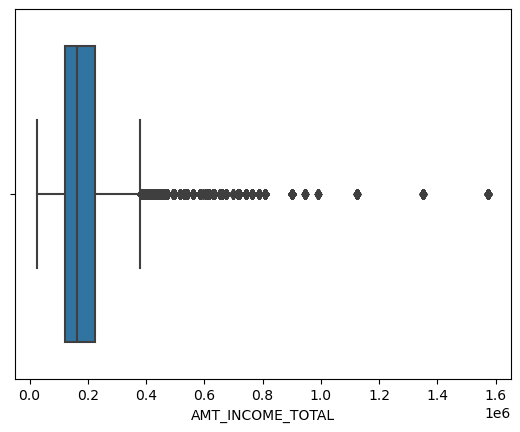

In [30]:
sns.boxplot(data = data , x=data["AMT_INCOME_TOTAL"] )

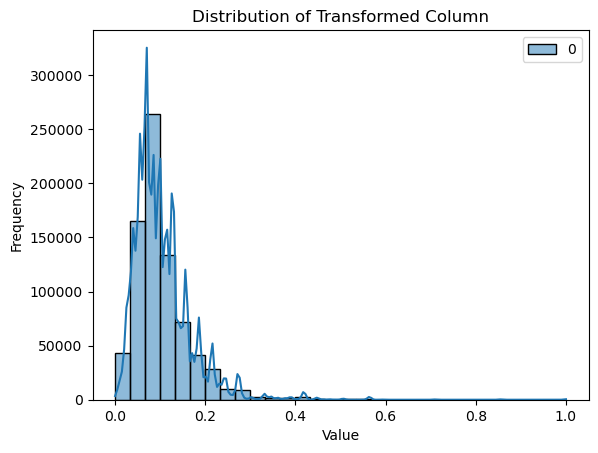

In [31]:
from sklearn.preprocessing import MinMaxScaler

# Initialize the MinMaxScaler
scaler = MinMaxScaler()

# Fit and transform the 'AMT_INCOME_TOTAL' column to scale it between 0 and 1
normalized_column = scaler.fit_transform(data[["AMT_INCOME_TOTAL"]])

# Create a histogram with a Kernel Density Estimate (KDE) to show the distribution of the normalized column
sns.histplot(normalized_column, kde=True, bins=30)

# Add a title and labels to the plot
plt.title("Distribution of Transformed Column")
plt.xlabel("Value")
plt.ylabel("Frequency")

# Show the plot
plt.show()

count    766887.000000
mean     181818.684887
std       82502.057119
min       27000.000000
25%      121500.000000
50%      157500.000000
75%      225000.000000
max      472500.000000
Name: AMT_INCOME_TOTAL, dtype: float64


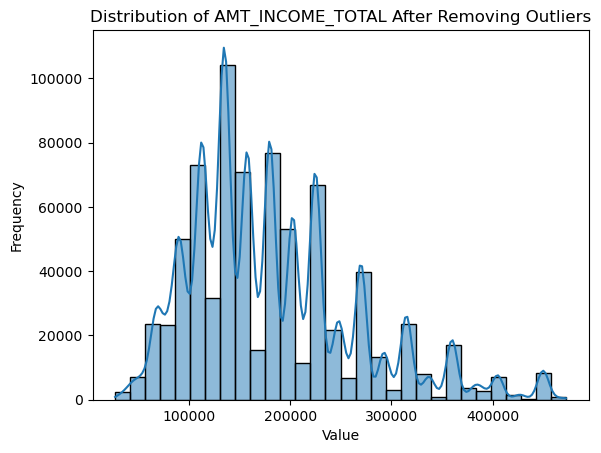

In [32]:
# Step 1: Save the original 'AMT_INCOME_TOTAL' column in a new column
data["AMT_INCOME_TOTAL_ORIGINAL"] = data["AMT_INCOME_TOTAL"]

# Step 2: Normalize the 'AMT_INCOME_TOTAL' column using MinMaxScaler
scaler = MinMaxScaler()
data["AMT_INCOME_TOTAL_NORMALIZED"] = scaler.fit_transform(data[["AMT_INCOME_TOTAL"]])

# Step 3: Remove rows where the normalized 'AMT_INCOME_TOTAL' is greater than 0.3
data = data[data["AMT_INCOME_TOTAL_NORMALIZED"] <= 0.3].reset_index(drop=True)

# Step 4: Restore the original 'AMT_INCOME_TOTAL' column
data["AMT_INCOME_TOTAL"] = data["AMT_INCOME_TOTAL_ORIGINAL"]

# Step 5: Drop the normalized columns to clean the data
data.drop(columns=["AMT_INCOME_TOTAL_NORMALIZED", "AMT_INCOME_TOTAL_ORIGINAL"], inplace=True)

# Step 6: Print the descriptive statistics for the 'AMT_INCOME_TOTAL' column
print(data["AMT_INCOME_TOTAL"].describe())

# Step 7: Plot the distribution of 'AMT_INCOME_TOTAL' after removing outliers
sns.histplot(data["AMT_INCOME_TOTAL"], kde=True, bins=30)
plt.title("Distribution of AMT_INCOME_TOTAL After Removing Outliers")
plt.xlabel("Value")
plt.ylabel("Frequency")
plt.show()

In [33]:
data["NAME_INCOME_TYPE"].value_counts()

NAME_INCOME_TYPE
Working                 396095
Commercial associate    178085
Pensioner               127886
State servant            64484
Student                    337
Name: count, dtype: int64

In [34]:
# Filter out rows where the 'NAME_INCOME_TYPE' is 'Pensioner' or 'Student'
data = data[~data["NAME_INCOME_TYPE"].isin(["Pensioner", "Student"])].reset_index(drop=True)

# Display the value counts for the 'NAME_INCOME_TYPE' column after filtering
print(data["NAME_INCOME_TYPE"].value_counts())

NAME_INCOME_TYPE
Working                 396095
Commercial associate    178085
State servant            64484
Name: count, dtype: int64


In [35]:
data["NAME_EDUCATION_TYPE"].value_counts()

NAME_EDUCATION_TYPE
Secondary / secondary special    419468
Higher education                 184876
Incomplete higher                 28314
Lower secondary                    5187
Academic degree                     819
Name: count, dtype: int64

In [36]:
# Define a mapping of old education types to new categories
education_mapping = {
    "Higher education": "University education / complete",
    "Incomplete higher": "University education / complete",
    "Academic degree": "University education / complete",
    "Secondary / secondary special": "Pre-university education",
    "Lower secondary": "Pre-university education"
}

# Replace the values in the 'NAME_EDUCATION_TYPE' column based on the mapping
data["NAME_EDUCATION_TYPE"] = data["NAME_EDUCATION_TYPE"].replace(education_mapping)

# Display the value counts for the 'NAME_EDUCATION_TYPE' column after replacement
print(data["NAME_EDUCATION_TYPE"].value_counts())

NAME_EDUCATION_TYPE
Pre-university education           424655
University education / complete    214009
Name: count, dtype: int64


In [37]:
data["NAME_HOUSING_TYPE"].value_counts()

NAME_HOUSING_TYPE
House / apartment      564151
With parents            35154
Municipal apartment     20918
Rented apartment        10128
Office apartment         4847
Co-op apartment          3466
Name: count, dtype: int64

In [38]:
data["DAYS_BIRTH"].describe()

count    638664.000000
mean     -14987.132522
std        3443.411137
min      -24611.000000
25%      -17615.000000
50%      -14768.000000
75%      -12175.000000
max       -7489.000000
Name: DAYS_BIRTH, dtype: float64

<Axes: xlabel='DAYS_BIRTH'>

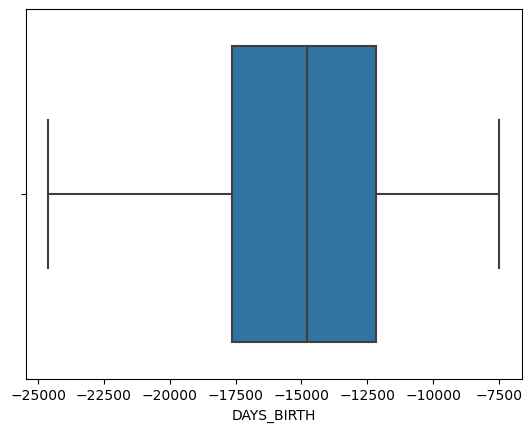

In [39]:
sns.boxplot(data = data , x=data["DAYS_BIRTH"] )

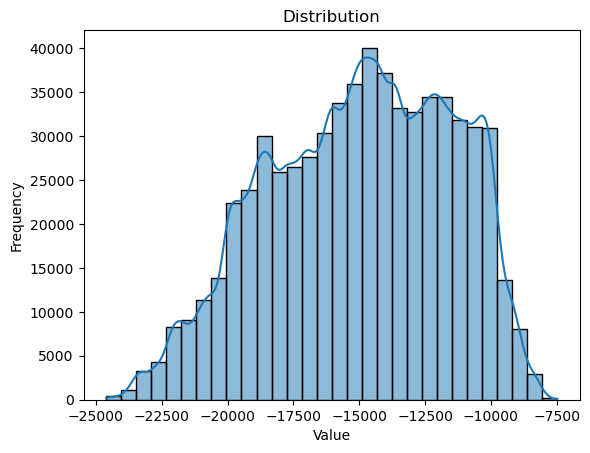

In [40]:
sns.histplot(data["DAYS_BIRTH"], kde=True, bins=30)
plt.title("Distribution")
plt.xlabel("Value")
plt.ylabel("Frequency")
plt.show()

In [41]:
data["DAYS_EMPLOYED"].describe()

count    638664.000000
mean      -2783.301775
std        2426.475842
min      -15713.000000
25%       -3668.000000
50%       -2170.000000
75%       -1048.000000
max         -17.000000
Name: DAYS_EMPLOYED, dtype: float64

<Axes: xlabel='DAYS_EMPLOYED'>

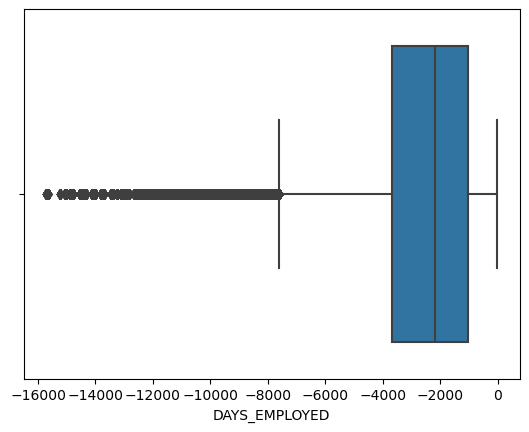

In [42]:
sns.boxplot(data = data , x=data["DAYS_EMPLOYED"] )

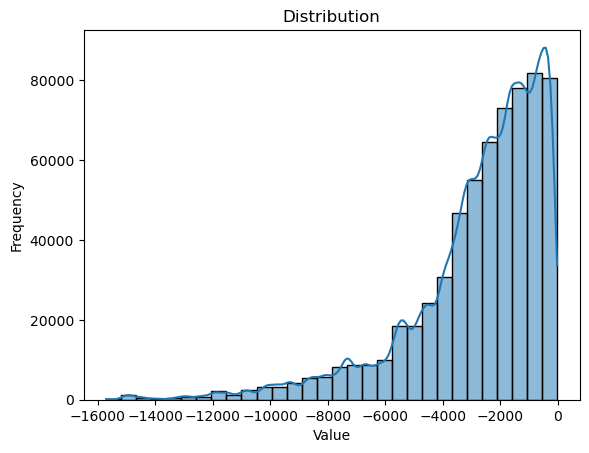

In [43]:
sns.histplot(data["DAYS_EMPLOYED"], kde=True, bins=30)
plt.title("Distribution")
plt.xlabel("Value")
plt.ylabel("Frequency")
plt.show()

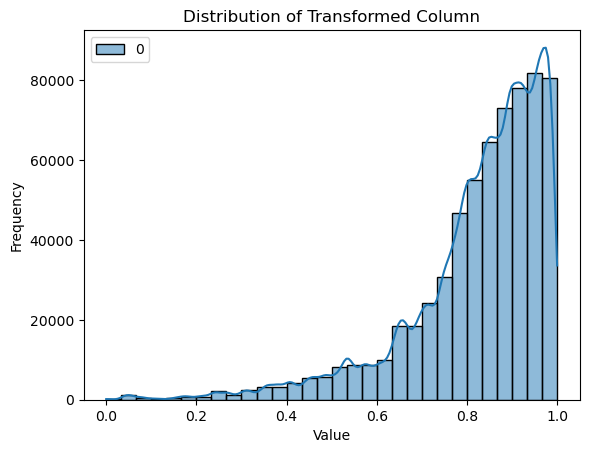

In [44]:
normalized_column = scaler.fit_transform(data[["DAYS_EMPLOYED"]])


sns.histplot(normalized_column, kde=True, bins=30)
plt.title("Distribution of Transformed Column")
plt.xlabel("Value")
plt.ylabel("Frequency")
plt.show()

count    622482.000000
mean      -2560.500554
std        2003.334315
min       -9422.000000
25%       -3506.000000
50%       -2092.000000
75%       -1018.000000
max         -17.000000
Name: DAYS_EMPLOYED, dtype: float64


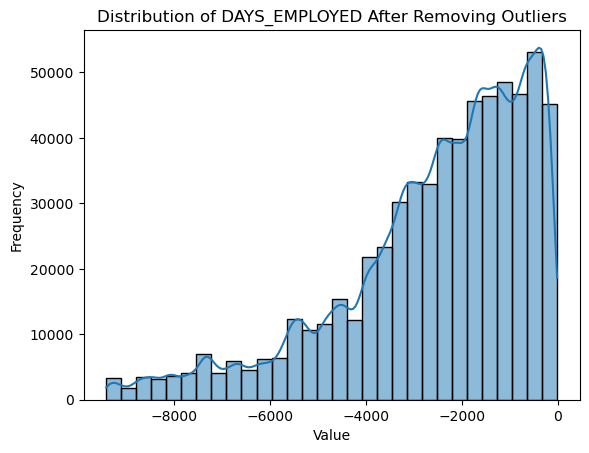

In [45]:
# Save the original 'DAYS_EMPLOYED' column as a backup
data["DAYS_EMPLOYED_ORIGINAL"] = data["DAYS_EMPLOYED"]

# Normalize the 'DAYS_EMPLOYED' column using MinMaxScaler
scaler = MinMaxScaler()
data["DAYS_EMPLOYED_NORMALIZED"] = scaler.fit_transform(data[["DAYS_EMPLOYED"]])

# Filter out rows where the normalized 'DAYS_EMPLOYED' is less than 0.4
data = data[data["DAYS_EMPLOYED_NORMALIZED"] >= 0.4].reset_index(drop=True)

# Restore the original 'DAYS_EMPLOYED' column
data["DAYS_EMPLOYED"] = data["DAYS_EMPLOYED_ORIGINAL"]

# Drop the temporary normalized columns
data.drop(columns=["DAYS_EMPLOYED_NORMALIZED", "DAYS_EMPLOYED_ORIGINAL"], inplace=True)

# Display the descriptive statistics of the 'DAYS_EMPLOYED' column
print(data["DAYS_EMPLOYED"].describe())

# Plot the distribution of 'DAYS_EMPLOYED' after removing outliers
sns.histplot(data["DAYS_EMPLOYED"], kde=True, bins=30)
plt.title("Distribution of DAYS_EMPLOYED After Removing Outliers")
plt.xlabel("Value")
plt.ylabel("Frequency")
plt.show()

In [46]:
data["FLAG_MOBIL"].value_counts()

FLAG_MOBIL
1    622482
Name: count, dtype: int64

In [47]:
data = data.drop(columns=["FLAG_MOBIL"])

In [48]:
data.drop(columns=["FLAG_EMAIL"] , inplace = True)

In [49]:
data["FLAG_WORK_PHONE"].value_counts()

FLAG_WORK_PHONE
0    448962
1    173520
Name: count, dtype: int64

In [50]:
data["CNT_FAM_MEMBERS"].value_counts()

CNT_FAM_MEMBERS
2.0     321949
3.0     128378
1.0      96631
4.0      65174
5.0       8724
6.0       1190
7.0        273
15.0       111
9.0         46
20.0         6
Name: count, dtype: int64

In [51]:
data = data[data["CNT_FAM_MEMBERS"] <= 4]

print(data["CNT_FAM_MEMBERS"].value_counts())

CNT_FAM_MEMBERS
2.0    321949
3.0    128378
1.0     96631
4.0     65174
Name: count, dtype: int64


In [52]:
data["first_month"].describe()

count    612132.000000
mean        -34.662395
std          15.009878
min         -60.000000
25%         -47.000000
50%         -36.000000
75%         -23.000000
max           0.000000
Name: first_month, dtype: float64

<Axes: xlabel='first_month'>

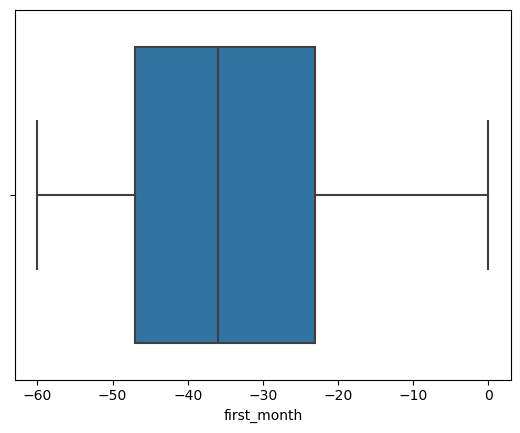

In [53]:
sns.boxplot(data = data , x=data["first_month"] )

In [54]:
# Calculate 'AGE_YEARS' by dividing 'DAYS_BIRTH' by -365 and rounding to 1 decimal place
data['AGE_YEARS'] = (data['DAYS_BIRTH'] / -365).round(1)  

# Calculate 'YEARS_EMPLOYED' by dividing 'DAYS_EMPLOYED' by -365 and rounding to 1 decimal place
data['YEARS_EMPLOYED'] = (data['DAYS_EMPLOYED'] / -365).round(1)

# Display the first few rows of 'AGE_YEARS' and 'YEARS_EMPLOYED' columns
data[['AGE_YEARS', 'YEARS_EMPLOYED']].head()

,AGE_YEARS,YEARS_EMPLOYED
0,32.9,12.4
1,32.9,12.4
2,32.9,12.4
3,32.9,12.4
4,32.9,12.4


In [55]:
data.drop(columns = ["DAYS_BIRTH" , "DAYS_EMPLOYED"] , axis = 1 , inplace = True)

In [60]:
data

,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,FLAG_WORK_PHONE,FLAG_PHONE,CNT_FAM_MEMBERS,first_month,STATUS,AGE_YEARS,YEARS_EMPLOYED
0,M,Y,Y,0,427500.0,Working,University education / complete,Civil marriage,Rented apartment,1,0,2.0,-15.0,0.0,32.9,12.4
1,M,Y,Y,0,427500.0,Working,University education / complete,Civil marriage,Rented apartment,1,0,2.0,-15.0,0.0,32.9,12.4
2,M,Y,Y,0,427500.0,Working,University education / complete,Civil marriage,Rented apartment,1,0,2.0,-15.0,0.0,32.9,12.4
3,M,Y,Y,0,427500.0,Working,University education / complete,Civil marriage,Rented apartment,1,0,2.0,-15.0,0.0,32.9,12.4
4,M,Y,Y,0,427500.0,Working,University education / complete,Civil marriage,Rented apartment,1,0,2.0,-15.0,0.0,32.9,12.4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
622477,M,N,Y,0,112500.0,Working,Pre-university education,Single / not married,Rented apartment,0,0,1.0,-13.0,0.0,25.2,3.3
622478,M,N,Y,0,112500.0,Working,Pre-university education,Single / not married,Rented apartment,0,0,1.0,-13.0,1.0,25.2,3.3
622479,M,N,Y,0,112500.0,Working,Pre-university education,Single / not married,Rented apartment,0,0,1.0,-13.0,1.0,25.2,3.3
622480,M,N,Y,0,112500.0,Working,Pre-university education,Single / not married,Rented apartment,0,0,1.0,-13.0,0.0,25.2,3.3


In [56]:
from sklearn.preprocessing import LabelEncoder

# Create an instance of LabelEncoder
encoder = LabelEncoder()

# Define the list of categorical columns to encode
columns = ["CODE_GENDER", "FLAG_OWN_CAR", "FLAG_OWN_REALTY", 
           "NAME_INCOME_TYPE", "NAME_EDUCATION_TYPE", 
           "NAME_FAMILY_STATUS", "NAME_HOUSING_TYPE"]

# Create a copy of the data
data2 = data

# Loop through each column in the 'columns' list and apply LabelEncoder
for column in columns:
    # Encode the categorical column and update it in data2
    data2[column] = encoder.fit_transform(data[column])

# Display the transformed data
data2

,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,FLAG_WORK_PHONE,FLAG_PHONE,CNT_FAM_MEMBERS,first_month,STATUS,AGE_YEARS,YEARS_EMPLOYED
0,1,1,1,0,427500.0,2,1,0,4,1,0,2.0,-15.0,0.0,32.9,12.4
1,1,1,1,0,427500.0,2,1,0,4,1,0,2.0,-15.0,0.0,32.9,12.4
2,1,1,1,0,427500.0,2,1,0,4,1,0,2.0,-15.0,0.0,32.9,12.4
3,1,1,1,0,427500.0,2,1,0,4,1,0,2.0,-15.0,0.0,32.9,12.4
4,1,1,1,0,427500.0,2,1,0,4,1,0,2.0,-15.0,0.0,32.9,12.4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
622477,1,0,1,0,112500.0,2,0,3,4,0,0,1.0,-13.0,0.0,25.2,3.3
622478,1,0,1,0,112500.0,2,0,3,4,0,0,1.0,-13.0,1.0,25.2,3.3
622479,1,0,1,0,112500.0,2,0,3,4,0,0,1.0,-13.0,1.0,25.2,3.3
622480,1,0,1,0,112500.0,2,0,3,4,0,0,1.0,-13.0,0.0,25.2,3.3


In [57]:
from sklearn.preprocessing import MinMaxScaler

numerical_columns = data2.select_dtypes(include=['float64', 'int64']).columns


scaler = MinMaxScaler()

# Fit and transform the data
data2[numerical_columns] = scaler.fit_transform(data2[numerical_columns])

data2

,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,FLAG_WORK_PHONE,FLAG_PHONE,CNT_FAM_MEMBERS,first_month,STATUS,AGE_YEARS,YEARS_EMPLOYED
0,1,1,1,0.0,0.898990,2,1,0,4,1.0,0.0,0.333333,0.750000,0.0,0.264392,0.480620
1,1,1,1,0.0,0.898990,2,1,0,4,1.0,0.0,0.333333,0.750000,0.0,0.264392,0.480620
2,1,1,1,0.0,0.898990,2,1,0,4,1.0,0.0,0.333333,0.750000,0.0,0.264392,0.480620
3,1,1,1,0.0,0.898990,2,1,0,4,1.0,0.0,0.333333,0.750000,0.0,0.264392,0.480620
4,1,1,1,0.0,0.898990,2,1,0,4,1.0,0.0,0.333333,0.750000,0.0,0.264392,0.480620
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
622477,1,0,1,0.0,0.191919,2,0,3,4,0.0,0.0,0.000000,0.783333,0.0,0.100213,0.127907
622478,1,0,1,0.0,0.191919,2,0,3,4,0.0,0.0,0.000000,0.783333,1.0,0.100213,0.127907
622479,1,0,1,0.0,0.191919,2,0,3,4,0.0,0.0,0.000000,0.783333,1.0,0.100213,0.127907
622480,1,0,1,0.0,0.191919,2,0,3,4,0.0,0.0,0.000000,0.783333,0.0,0.100213,0.127907


In [58]:
data2["STATUS"].value_counts()

STATUS
0.0    602934
1.0      9198
Name: count, dtype: int64

In [59]:
# Current distribution
total_samples = len(data2)  # Total number of rows in the original dataset
desired_ratio_majority = 0.5
desired_ratio_minority = 0.5

# Calculate the desired number of samples for each class
desired_majority_count = int(total_samples * desired_ratio_majority)
desired_minority_count = int(total_samples * desired_ratio_minority)

# Separate the dataset into majority and minority classes
majority_class = data2[data2["STATUS"] == 0.0]
minority_class = data2[data2["STATUS"] == 1.0]

# Resample majority and minority classes
majority_resampled = resample(
    majority_class,
    replace=False,  # Downsample the majority class
    n_samples=desired_majority_count,
    random_state=42
)

minority_resampled = resample(
    minority_class,
    replace=True,  # Upsample the minority class
    n_samples=desired_minority_count,
    random_state=42
)

# Combine the resampled datasets
data_balanced = pd.concat([majority_resampled, minority_resampled])

# Shuffle the dataset
data_balanced = data_balanced.sample(frac=1, random_state=42).reset_index(drop=True)

# Display the new class distribution
print("Class Distribution After Balancing:")
print(data_balanced["STATUS"].value_counts(normalize=True))

Class Distribution After Balancing:
STATUS
1.0    0.5
0.0    0.5
Name: proportion, dtype: float64


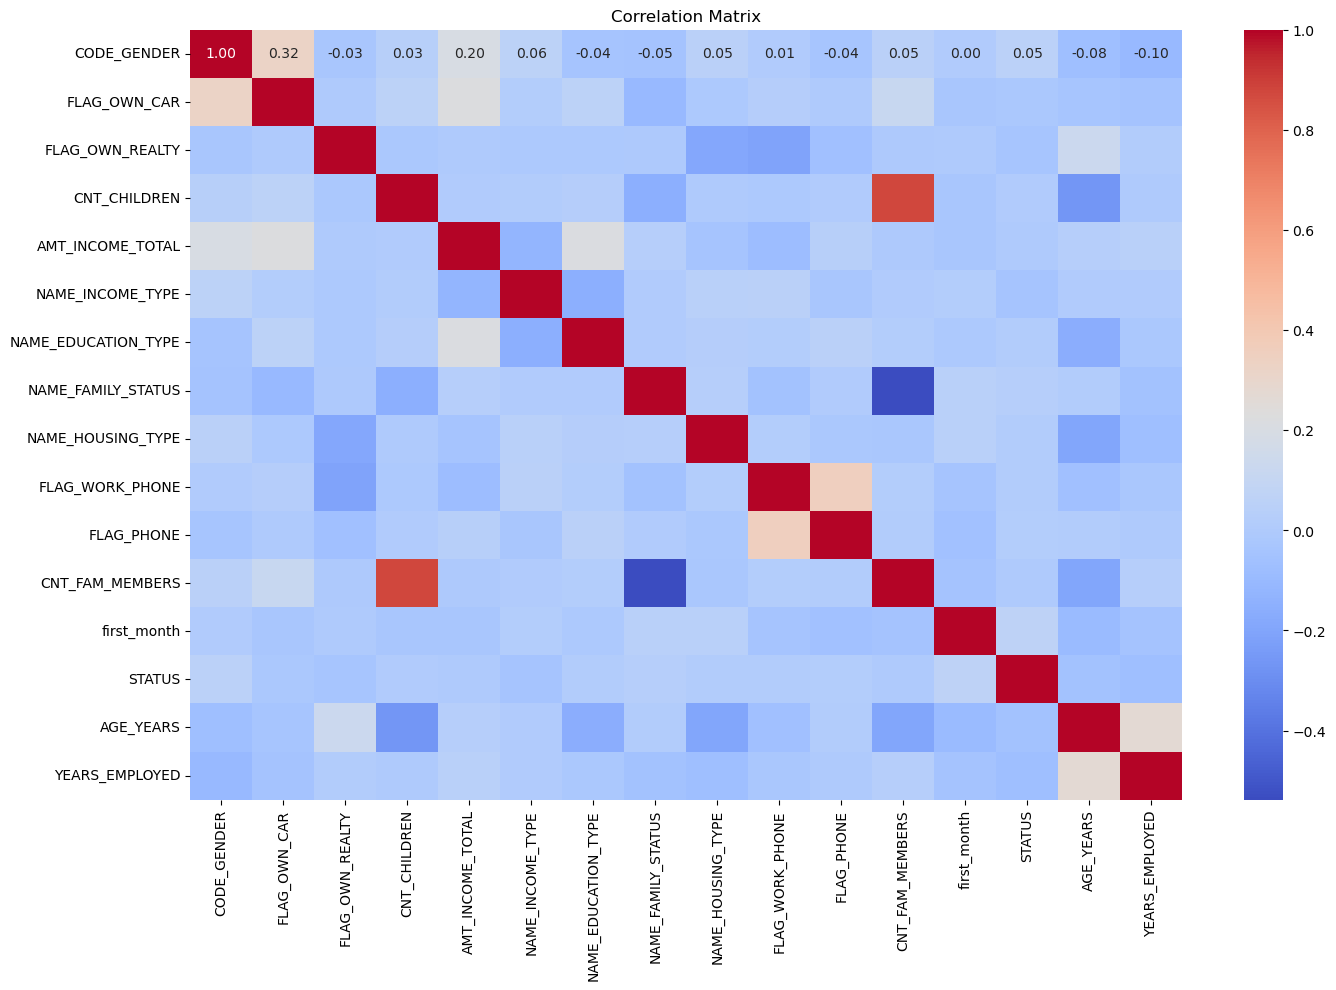

In [60]:
correlation_matrix = data_balanced.corr()
plt.figure(figsize=(16, 10))
sns.heatmap(correlation_matrix, annot=True, fmt=".2f", cmap="coolwarm", cbar=True)
plt.title("Correlation Matrix")
plt.show()

In [61]:
from sklearn.model_selection import  train_test_split
x = data_balanced.drop(columns=["STATUS"]  , axis = 1 )
y = data_balanced["STATUS"]

In [62]:
# Import PCA from sklearn's decomposition module
from sklearn.decomposition import PCA

# Initialize the PCA object (default settings will retain all components)
pca = PCA()

# Apply PCA to the data, transforming it to a new space of principal components
# 'x' should be your feature matrix (2D array or DataFrame)
pca_data = pca.fit_transform(x)

# Create a DataFrame to store the transformed data (principal components)
# Each column corresponds to a principal component (e.g., Principal Component 1, Principal Component 2, etc.)
pca_df = pd.DataFrame(pca_data, columns=[f'Principal Component {i+1}' for i in range(pca_data.shape[1])])

# Print the DataFrame with the transformed data
print(pca_df)

        Principal Component 1  Principal Component 2  Principal Component 3  \
0                   -0.282585              -0.595705               0.493905   
1                   -0.628180               0.315706              -1.163537   
2                    2.452392               0.099210              -1.759687   
3                   -0.512709               0.460908              -1.280751   
4                   -0.176655              -0.463490               0.477083   
...                       ...                    ...                    ...   
612127              -0.053911               1.339564               1.390597   
612128              -0.194366              -0.504553               0.563179   
612129               0.037283               2.069450               1.906849   
612130               3.398826               0.271196              -2.035250   
612131              -0.184109              -0.715334               0.531414   

        Principal Component 4  Principal Component 

In [63]:
# Split Data
x_train, x_test, y_train, y_test = train_test_split(pca_df, y, test_size=0.2, random_state=42)

In [64]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report

# Define the model with hyperparameters
rf_model = RandomForestClassifier(n_estimators=100, max_depth=10, random_state=42)  # Adjust hyperparameters

# Train the model
rf_model.fit(x_train, y_train)

# Make predictions on the test set
rf_predictions = rf_model.predict(x_test)

# Evaluate the model
rf_accuracy = accuracy_score(y_test, rf_predictions)
print(f"Random Forest Accuracy: {rf_accuracy:.4f}")
print("Random Forest Classification Report:")
print(classification_report(y_test, rf_predictions))

Random Forest Accuracy: 0.8264
Random Forest Classification Report:
              precision    recall  f1-score   support

         0.0       0.80      0.88      0.83     61263
         1.0       0.86      0.78      0.82     61164

    accuracy                           0.83    122427
   macro avg       0.83      0.83      0.83    122427
weighted avg       0.83      0.83      0.83    122427



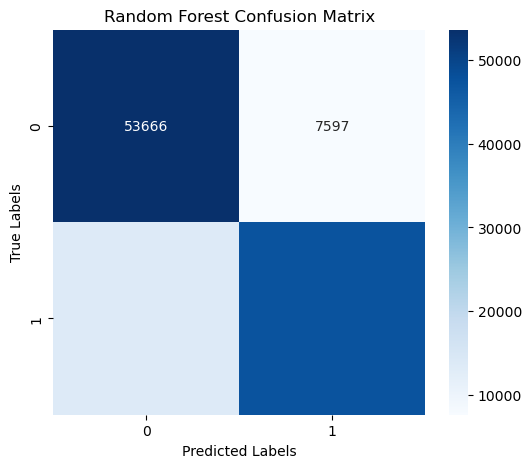

In [65]:
from sklearn.metrics import confusion_matrix

# Generate the confusion matrix for the Random Forest model
rf_cm = confusion_matrix(y_test, rf_predictions)

# Plot the confusion matrix using seaborn heatmap
plt.figure(figsize=(6, 5))
sns.heatmap(rf_cm, annot=True, fmt='d', cmap='Blues', xticklabels=[0, 1], yticklabels=[0, 1])
plt.title("Random Forest Confusion Matrix")
plt.xlabel("Predicted Labels")
plt.ylabel("True Labels")
plt.show()

In [66]:
from sklearn.linear_model import LogisticRegression

# Instantiate a LogisticRegression classifier with default parameter values
logreg = LogisticRegression()

# Fit logreg to the train set
logreg.fit(x_train, y_train)

# Make predictions on the test set
logreg_predictions = logreg.predict(x_test)

# Evaluate the model
logreg_accuracy = accuracy_score(y_test, logreg_predictions)
print(f"Logistic Regression Accuracy: {logreg_accuracy:.4f}")
print("Logistic Regression Classification Report:")
print(classification_report(y_test, logreg_predictions))

Logistic Regression Accuracy: 0.5544
Logistic Regression Classification Report:
              precision    recall  f1-score   support

         0.0       0.56      0.55      0.55     61263
         1.0       0.55      0.56      0.56     61164

    accuracy                           0.55    122427
   macro avg       0.55      0.55      0.55    122427
weighted avg       0.55      0.55      0.55    122427



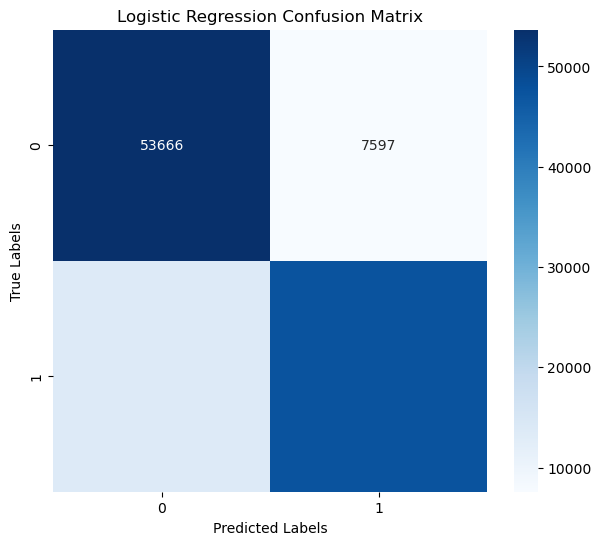

In [67]:
# Generate the confusion matrix for the Logistic Regression model
logreg_cm = confusion_matrix(y_test, logreg_predictions)

# Plot the confusion matrix using seaborn heatmap
plt.figure(figsize=(7, 6))
sns.heatmap(rf_cm, annot=True, fmt='d', cmap='Blues', xticklabels=[0, 1], yticklabels=[0, 1])
plt.title("Logistic Regression Confusion Matrix")
plt.xlabel("Predicted Labels")
plt.ylabel("True Labels")
plt.show()

In [68]:
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, classification_report

# Instantiate an SVM classifier with default parameter values
svm_model = SVC()

# Fit SVM to the train set
svm_model.fit(x_train, y_train)

# Make predictions on the test set
svm_predictions = svm_model.predict(x_test)

# Evaluate the model
svm_accuracy = accuracy_score(y_test, svm_predictions)
print(f"SVM Accuracy: {svm_accuracy:.4f}")
print("SVM Classification Report:")
print(classification_report(y_test, svm_predictions))

SVM Accuracy: 0.7416
SVM Classification Report:
              precision    recall  f1-score   support

         0.0       0.73      0.76      0.75     61263
         1.0       0.75      0.72      0.74     61164

    accuracy                           0.74    122427
   macro avg       0.74      0.74      0.74    122427
weighted avg       0.74      0.74      0.74    122427

